In [2]:
%pip install --upgrade pip
%pip install numpy networkx scipy joblib
import Sequencer

  Attempting uninstall: pip


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



    Found existing installation: pip 21.2.4
    Uninstalling pip-21.2.4:
      Successfully uninstalled pip-21.2.4
Note: you may need to restart the kernel to use updated packages.


## Import libraries

In [4]:
%pip install --upgrade pip
%pip install numpy networkx scipy joblib matplotlib pandas astropy requests json

# imports
%matplotlib inline


import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
from astropy.table import QTable
from matplotlib.colors import LogNorm
import glob
import requests
import matplotlib as mpl
import matplotlib.cm as cm
import requests

import json

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement json (from versions: none)
ERROR: No matching distribution found for json


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scipy in c:\users\vst\appdata\local\programs\python\python310\lib\site-packages (1.8.0)



In [153]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
path_fits = 'dataset/fits/'
path_json = 'dataset/fits.json'

PATH_FILE = "PATH_FILE"
SPEC = "SPEC"
PLATE = "PLATE"
REDSHIFT = "REDSHIFT"

fits_json_object = json.load(open(path_json))
len(fits_json_object)

84

In [7]:
spectra_list = []
# spectra_path_list = glob.glob("/content/drive/My Drive/TFM/fits/0003/*")

In [8]:
spectra_list = []

for f in fits_json_object:
    if float(f[REDSHIFT]) < 0.5:
        h = fits.open(f[PATH_FILE])
        name = (h.filename())[-25:-5]
        Y = pd.DataFrame(h[1].data)
        z = f[REDSHIFT]
        # normalize the spectrum
        norm = Y['flux'].values / (1 + z)
        spectra_list.append(norm)
        
print("number of stellar spectra: %s" % len(spectra_list))
print("length of each spectrum: %s" % len(spectra_list[0]))

number of stellar spectra: 11
length of each spectrum: 3842


In [9]:
dfx = pd.DataFrame(spectra_list)
dfx

,0,1,2,3,4,5,6,7,8,9,...,3832,3833,3834,3835,3836,3837,3838,3839,3840,3841
0,10.732282,13.054902,8.495893,12.585344,8.855869,7.034163,8.568563,8.869055,11.978216,11.244061,...,2.718396,1.752326,3.711835,3.174645,3.491045,2.146911,3.742188,1.908443,3.627291,2.997181
1,27.528788,28.566563,33.534191,34.978855,33.650349,32.357784,29.663347,31.671032,34.345692,34.373543,...,5.825690,6.666550,4.674603,4.793789,5.608489,5.658308,NaN,NaN,NaN,NaN
2,28.967852,26.142696,25.308693,28.120777,28.295538,23.423773,24.258036,25.438297,22.708555,24.214813,...,8.792455,7.912009,7.528607,6.144482,NaN,NaN,NaN,NaN,NaN,NaN
3,16.473179,17.365734,17.563282,18.613871,27.613049,21.236462,19.923712,16.533678,15.822536,19.497189,...,7.152256,8.742682,6.593788,6.042570,6.985540,7.026637,6.791172,6.740811,6.297705,NaN
4,6.492279,7.206094,9.370858,8.293564,5.328206,5.045542,9.155809,12.553256,8.428180,6.128479,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,12.306439,14.211294,14.208714,13.045620,11.404428,14.551346,8.394671,9.874825,9.203354,8.349459,...,3.945056,5.206341,4.112047,4.797537,3.627915,3.649482,4.398110,4.677409,NaN,NaN
6,16.113714,14.756186,14.719579,16.160656,9.877611,11.792864,19.146225,15.669973,13.122326,12.991245,...,14.264827,14.554072,13.532321,13.663220,16.802763,15.710960,NaN,NaN,NaN,NaN
7,8.353518,12.969683,17.269718,15.327478,10.444993,8.972098,13.150756,13.292508,10.813439,17.034641,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,32.184181,33.858006,35.530296,38.899883,24.399837,26.491024,37.128086,37.726017,32.255436,28.237654,...,4.177712,2.787068,2.622577,2.248039,4.805136,2.989607,1.440020,2.516215,3.715727,NaN
9,12.614293,12.070219,9.979747,8.735146,11.414249,19.320894,11.850578,14.669048,15.513826,13.501584,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [163]:
dfx2 = dfx.fillna(0)

In [164]:
spectra_matrix = dfx2.to_numpy()

In [165]:
# load the spectra and construct the wavelength range 
wavelength = np.arange(3145, 7000, 1)
print(wavelength.shape, spectra_matrix.shape)

(3855,) (1937, 3855)


In [166]:
indices_for_plot = np.arange(len(spectra_matrix))
X, Y = np.meshgrid(wavelength, indices_for_plot)

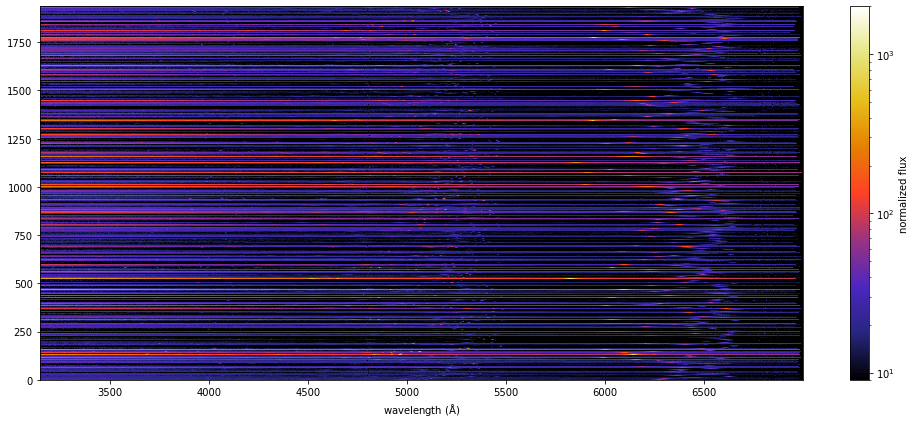

In [167]:
plt.figure(1, figsize=(14, 6))
plt.pcolormesh(X, Y, spectra_matrix.clip(9, 2000), cmap="CMRmap", norm=LogNorm())
plt.xlabel("wavelength ($\\mathrm{\\AA}$)")
plt.colorbar(label="normalized flux")
plt.tight_layout()

In [168]:
## Normalizing dataset (Min-Max normalization)
spectrum = spectra_matrix.data
n1 = spectrum - numpy.min(spectrum)
n2 = numpy.max(spectrum) - numpy.min(spectrum)
norm_spectrum = n1/n2
norm_spectrum = norm_spectrum +1

In [169]:
print('avg', numpy.median(spectrum))
print('max', numpy.max(spectrum))
print('min', numpy.min(spectrum))

avg 14.404778480529785
max 2035.1285400390625
min -72.63993072509766


In [170]:
print('avg', numpy.median(norm_spectrum))
print('max', numpy.max(norm_spectrum))
print('min', numpy.min(norm_spectrum))

avg 1.0412970923576201
max 2.0
min 1.0


In [171]:
#Parametros del secuenciador, tanto metricas como escalas
estimator_list = ['EMD']
scale_list = [[1]]

In [172]:
seq = Sequencer(wavelength, norm_spectrum, estimator_list, scale_list)
output_path = "/root/"
final_elongation, final_sequence = seq.execute(output_path, to_average_N_best_estimators=True, 
                                              number_of_best_estimators=3,)
print("resulting elongation for the Sequencer: ", final_elongation)

# print the intermediate elongations for different metrics + scales
estimator_list, scale_list, elongation_list = seq.return_elongation_of_weighted_products_all_metrics_and_scales()

print("Intermediate elongations for the different metrics and scales:")
for i in range(len(estimator_list)):
    print("metric=%s, scale=%s, elongation: %s" % (estimator_list[i], 
                                                   scale_list[i], 
                                                   numpy.round(elongation_list[i], 2)))

# order the input dataset according to the detected sequence
objects_list_ordered = spectra_matrix[final_sequence]

calculating the distance matrices for estimator: EMD, scale: 1
finished calculating this distance matrix list, it took: 1639.5323493480682 seconds
dumped the distance matrix dictionaries to the file: /root//distance_matrices.pkl
strating to sequence the different scales and estimators
in estimator: EMD, scale: 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:896: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


dumped the elongations to the file: /root//elongations.pkl
dumped the full weighted distance matrix to the file: /root//weighted_distance_matrix.pkl


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1024: RuntimeWarning: divide by zero encountered in true_divide


dumped the sparse distance matrix to the file: <_io.BufferedWriter name='/root//sparse_distance_matrix.pkl'>
dumped the final sequences and elongation to the file: <_io.BufferedWriter name='/root//final_products.pkl'>
resulting elongation for the Sequencer:  63.86129762799212
Intermediate elongations for the different metrics and scales:
metric=EMD, scale=1, elongation: 63.86


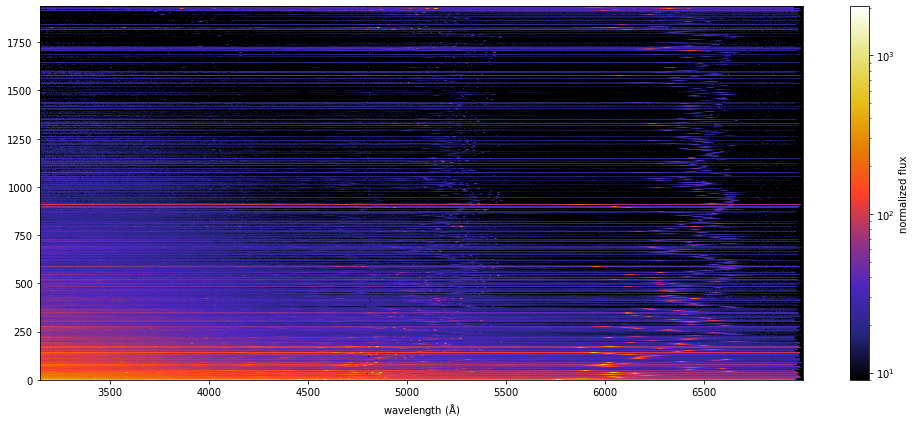

In [173]:
# plot the ordered dataset
plt.figure(1, figsize=(14, 6))
plt.pcolormesh(X, Y, objects_list_ordered.clip(9, 20000), cmap="CMRmap", norm=LogNorm())
plt.xlabel("wavelength ($\\mathrm{\\AA}$)")
plt.colorbar(label="normalized flux")
plt.tight_layout()

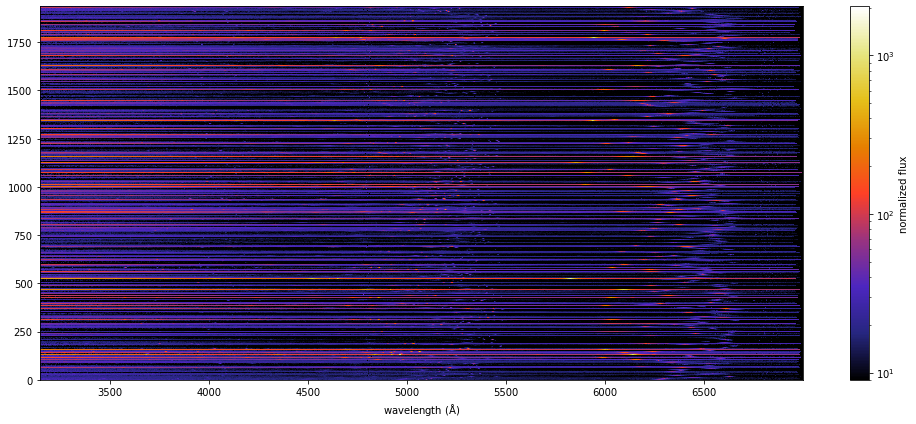

In [174]:
# comparison original
plt.figure(1, figsize=(14, 6))
plt.pcolormesh(X, Y, spectra_matrix.clip(9, 20000), cmap="CMRmap", norm=LogNorm())
plt.xlabel("wavelength ($\\mathrm{\\AA}$)")
plt.colorbar(label="normalized flux")
plt.tight_layout()